<a href="https://colab.research.google.com/github/milvish/Computer_Vision_Projects/blob/main/CV_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir media
!wget https://github.com/milvish/Computer_Vision_Projects/blob/main/media/moon.jpg?raw=true -P media &> /dev/null
!wget https://github.com/milvish/Computer_Vision_Projects/blob/main/media/Project1/view.jpg?raw=true -P media &> /dev/null
!wget https://github.com/milvish/Computer_Vision_Projects/blob/main/media/Project1/background2.jpg?raw=true -P media &> /dev/null
!wget https://github.com/milvish/Computer_Vision_Projects/blob/main/media/Project1/green_screen.jpg?raw=true -P media &> /dev/null

#Задача зелёного экрана

In [ ]:
import numpy as np # Изображения будут в формате np.array
import matplotlib # Для отрисовки

from matplotlib import pyplot as plt
from skimage import io # Для считываения
from skimage import color
from skimage import exposure

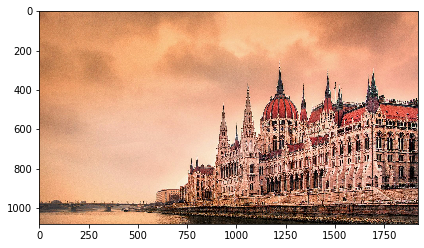

In [ ]:
from skimage import transform, img_as_float

# Заменим фон у изображения на зеленом фоне
green_screen_img = io.imread('./media/green_screen.jpg?raw=true')[..., :3]
green_screen_img = img_as_float(green_screen_img)
background =io.imread ('./media/background2.jpg?raw=true') 
background = img_as_float(background)

io.imshow(green_screen_img)
io.imshow(background)

Text(0.5, 1.0, 'hue distribution')

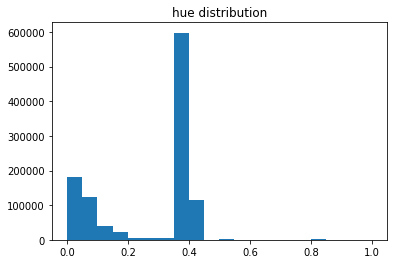

In [ ]:
# Посмотрим на распределение пикселей

hsv_img = color.rgb2hsv(green_screen_img[..., :3])
plt.hist(hsv_img[..., 0].reshape(-1), bins=20)
plt.title('hue distribution')

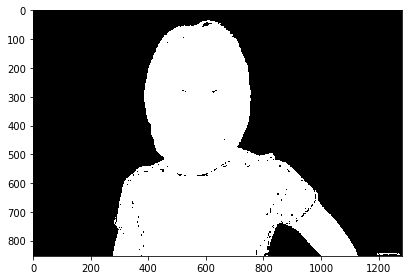

In [ ]:
mask = (hsv_img[..., 0] < .25) | (hsv_img[..., 0] > .55)
io.imshow(mask.astype(float))

In [ ]:
from skimage import morphology 

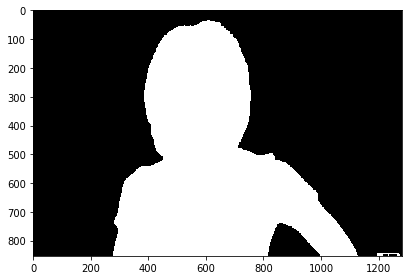

In [ ]:
opened = morphology.binary_closing(mask, selem=np.ones([12, 12])).astype(float)
io.imshow(opened)

In [ ]:
print(background.shape)
print(green_screen_img.shape)

(853, 1280, 3)
(853, 1280, 3)


In [ ]:
from skimage import transform # нужно для приведения к одному размеру

background = transform.resize(background, green_screen_img.shape[:2])

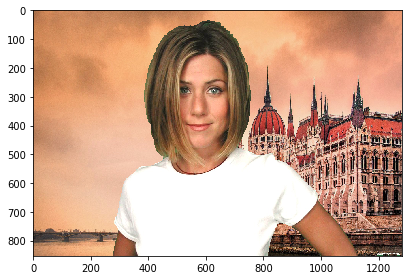

In [ ]:
changed_background = green_screen_img * opened[..., None] + background * (1- opened[..., None])
io.imshow(changed_background)

#Гистограммы

Гистограммы - расширение цветового диапазона.
Много однотонного цвета
Плохо видно детали.
Выравнивание гистограммы
1. Представим, что пиксели из случайного распределения.
2. Посчитаем функцию распределения c(I)
3. Применим c(I) к каждому пикселю на изображении.

Цветные изображения.
1. Переводим в пространство с компонентной яркости. применяем её (HSV)
2. Применяем для каждого канала отдельно.
AHE (Adaptive histogram equalization) - Адаптивное выравнивание гистограммы.
Применение на фиксированном разбиении.
Для остальных приблизим функции распределения билинейной интерполяцией.
Усредним функции распределения.
добавить больше разбиений.
Делим картинку на кусочки
Считаем в каждом функцию распределения.
Делаем выравнивание с помощью билинейной интерполяции.

Обрезать гистограмму сверху (где много одинаковых пикселей)
Contrast Limited AHE (CLAHE)
Выравнивание изображения нужно,чтобы лучше рассмотреть,что на изображении.
AHE часто работает лучше обычного выравнивания, но дольше.
CLAHE - хороший выбор, если хочется сделать изображение красивее с помощью гистограммы.

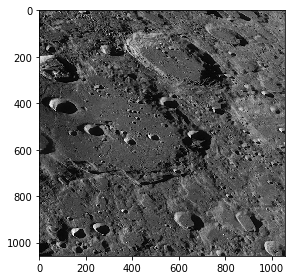

In [ ]:
moon = io.imread('./media/moon1.jpg')
io.imshow (moon)

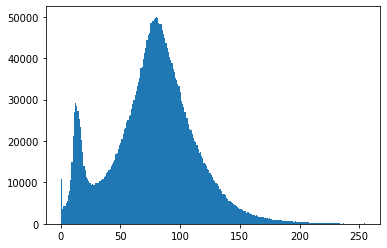

In [ ]:
plt.hist(moon.ravel(), bins=256);

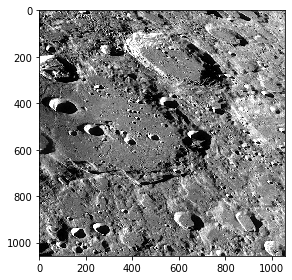

In [ ]:
p2, p98 = np.percentile(moon, (2, 98))
rescaled = exposure.rescale_intensity(moon, in_range=(p2, p98))
io.imshow(rescaled)

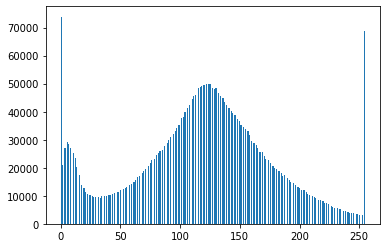

In [ ]:
plt.hist(rescaled.ravel(), bins=256);

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


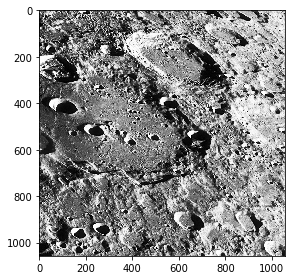

In [ ]:
equalized_hist = exposure.equalize_hist(moon)
io.imshow(equalized_hist)

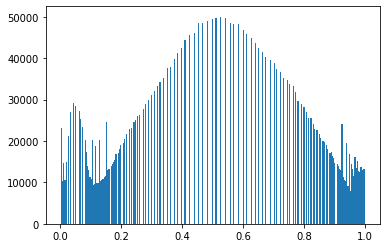

In [ ]:
plt.hist(equalized_hist.ravel(), bins=256);

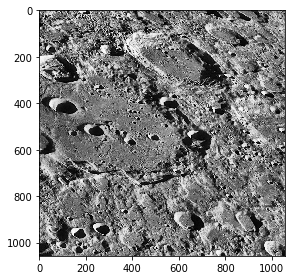

In [ ]:
equalized_adapt_hist = exposure.equalize_adapthist(moon)
io.imshow(equalized_adapt_hist)